# TEDx

In [181]:
import os
import pandas as pd
import docx
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import unidecode
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib.ticker import MaxNLocator
import numpy as np

Crear db

In [162]:
def get_text(filename):
    doc = docx.Document(filename)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

In [163]:
df = pd.DataFrame(columns=['file', 'text'])

In [164]:
directory = 'data/'

In [165]:
for root, subdirs, files in os.walk(directory):
    print('--\nroot = ' + root)
    list_file_path = os.path.join(root, 'my-directory-list.txt')
    print('list_file_path = ' + list_file_path)

    with open(list_file_path, 'wb') as list_file:
        for subdir in subdirs:
            print('\t- subdirectory ' + subdir)

        for filename in files:
            file_path = os.path.join(root, filename)
            if filename.endswith(".docx"): 
                print("docx!")
                print(file_path)
                text = get_text(file_path)
                lines = []
                pattern = re.compile("[0-9]{1,2}:[0-9]{2}")
                for a_line in text.split('\n'):
                    if not pattern.match(a_line):
                        lines.append(a_line)
                text = "\n".join(lines)
            elif filename.endswith('.txt'):
                print("txt!")
                print(file_path) 
                with open(file_path, 'r') as f:
                    text = f.read()
#                     first_line = text.split('\n')[0]
#                     second_line = text.split('\n')[1]
#                     if first_line.lower().startswith("traductor") and second_line.lower().startswith("revisor"):
#                         text = "\n".join(text.split('\n')[2:])
            else:
                continue

            data = pd.DataFrame({"file": [filename], "text": [text]})
            df = df.append(data, ignore_index=True)

--
root = data/
list_file_path = data/my-directory-list.txt
	- subdirectory 2013
	- subdirectory 2014
	- subdirectory 2015
	- subdirectory 2012
	- subdirectory 2017
	- subdirectory 2010
	- subdirectory 2018
	- subdirectory 2011
	- subdirectory 2016
txt!
data/my-directory-list.txt
--
root = data/2013
list_file_path = data/2013/my-directory-list.txt
txt!
data/2013/Quien_es_Dios_para_mi_Margarita_Barrientos_2013.txt
txt!
data/2013/Neurociencia_para_todos_Timothy_Marzullo_2013.txt
txt!
data/2013/Prisioneros_de_nuestros_propios_recursos_Jonathan_Levav_2013.txt
txt!
data/2013/Genetica_y_derechos_humanos_Victor_Penchaszadeh_2013.txt
txt!
data/2013/El_corazon_de_una_mujer_puede_romperse_en_serio_Florencia_Rolandi_2013.txt
txt!
data/2013/El_ultimo_de_los_Brenman_Esteban_Brenman_2013.txt
txt!
data/2013/Cinco_por_ciento_Andy_Freire_2013.txt
txt!
data/2013/El_lado_sucio_de_la_limpieza_David_Pizarro_2013.txt
txt!
data/2013/Contando_desde_los_margenes_Jose_Luis_Gallego_2013.txt
txt!
data/2013/my-dir

"Un hechicero lo hizo"

Recuperemos el dataframe editado

In [166]:
df = pd.read_csv("raw_df.csv", sep='|').reset_index(drop=True)
df.head()

,Unnamed: 0,file,title,speaker,year,text,words,tokens,le_d,ly_d,n_words,n_words_no_rep
0,0,Quien_es_Dios_para_mi_Margarita_Barrientos_201...,Quien es Dios para mi,Margarita Barrientos,2013,( ) Soy santiagueña. He venido hace muchos año...,"['', 'Soy', 'santiagueña', 'He', 'venido', 'ha...","['(', ')', 'Soy', 'santiagueña', '.', 'He', 'v...",57.734662,1.589167,1907,580
1,1,Neurociencia_para_todos_Timothy_Marzullo_2013.txt,Neurociencia para todos,Timothy Marzullo,2013,Supongamos que estás interesado en la neurocie...,"['Supongamos', 'que', 'estás', 'interesado', '...","['Supongamos', 'interesado', 'neurociencia', '...",60.831586,2.385000,2862,926
2,2,Prisioneros_de_nuestros_propios_recursos_Jonat...,Prisioneros de nuestros propios recursos,Jonathan Levav,2013,"En la vida, algunas decisiones son muy fáciles...","['En', 'la', 'vida', 'algunas', 'decisiones', ...","['En', 'vida', ',', 'decisiones', 'fáciles', '...",62.803677,2.538333,3046,920
3,3,Genetica_y_derechos_humanos_Victor_Penchaszade...,Genetica y derechos humanos,Victor Penchaszadeh,2013,En noviembre de 1982 me encontré en la ciudad ...,"['En', 'noviembre', 'de', '1982', 'me', 'encon...","['En', 'noviembre', '1982', 'encontré', 'ciuda...",56.484561,1.754167,2105,740
4,4,El_corazon_de_una_mujer_puede_romperse_en_seri...,El corazón de una mujer puede romperse en serio,Florencia Rolandi,2013,( ) ¿De qué se mueren los hombres? La primera ...,"['', 'De', 'qué', 'se', 'mueren', 'los', 'homb...","['(', ')', '¿De', 'mueren', 'hombres', '?', 'L...",57.318182,1.833333,2200,679


Revisemos la distribución de los años

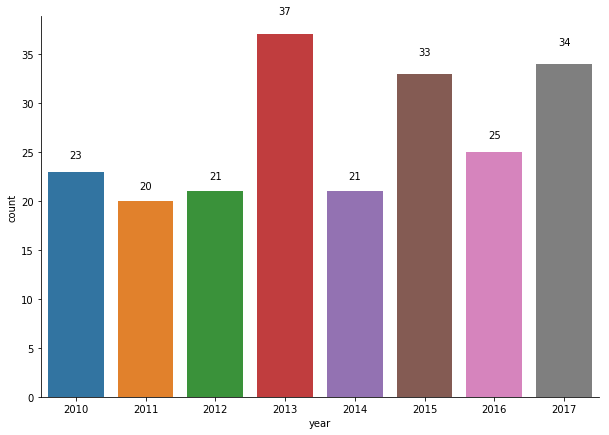

In [167]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='year', data=df)
sns.despine()
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '%d' % int(height),
            ha='center', va='bottom')
plt.plot;

Claramente está desbalanceado, por sobre todo contra 2018. Vamos a tomar la decisión de dropearlo (no utilizar 2018). 

In [168]:
df = df[df['year'] != 2018]

# 20 palabras más usadas en todas las charlas

In [169]:
aclarations = ['(Risas)', '(Aplausos)', '(Palmas)', '(Silbidos)', '(Fin de aplausos)', 
               '(Exhalación)', '(Canta) ', '(Agita un frasco)', '(Actúa)', '(Fin de actuación)',
               '(Video)', '(Fin del Video)', '(Inicia música de fondo)', '(Cesa la música de fondo)', 
               '(Música de fondo)', '(Sonido de radio sin sintonizar)', '(Fin de sintonización)',
               '(Tintineo de monedas)', '(Sonido de teléfono a disco)', '(Guitarra)', 
               '(Fusión de sonidos auto-repetitivos)', '(Tose)', '(Galimatías)', '(Beatbox)',
               '(Sonido de radio sintonizada)', '(Ovaciones)', '(Mueca imitando a la rana)',
               '(Imita sonido)', '(Inglés)',re.compile(r"--.*--"), re.compile(r"♪.*♪")]


for an_aclaration in aclarations:
    df['text'] = df['text'].str.replace(an_aclaration, ' ')

df['text'] = df['text'].str.replace("\n", ' ')
df['words'] = df.text.str.strip().str.split('[\W_]+')
rows = list()
for row in df[['words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((word))

words = pd.DataFrame(rows, columns=['word'])
words = words[words.word.str.len() > 0]
words['word'] = words.word.str.lower()
counts = words.word.value_counts().to_frame().rename(columns={'word':'count_per_word'})

stopwords = stopwords.words('spanish')
for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)
        
drop_list = ['aplausos', 'si', 'entonces', 'así', 'risas', 'hace', 'vez', 'va', 'the', 'cada', 'ahí', 'dos', 'después', 'cosas', 'ejemplo', 'tener', 'muchas', 'todas', 'voy']
for a_word in counts.index:
    if unidecode.unidecode(a_word) in stopwords:
        drop_list.append(a_word)

counts = counts.drop(drop_list)
top_20 = counts.head(20)

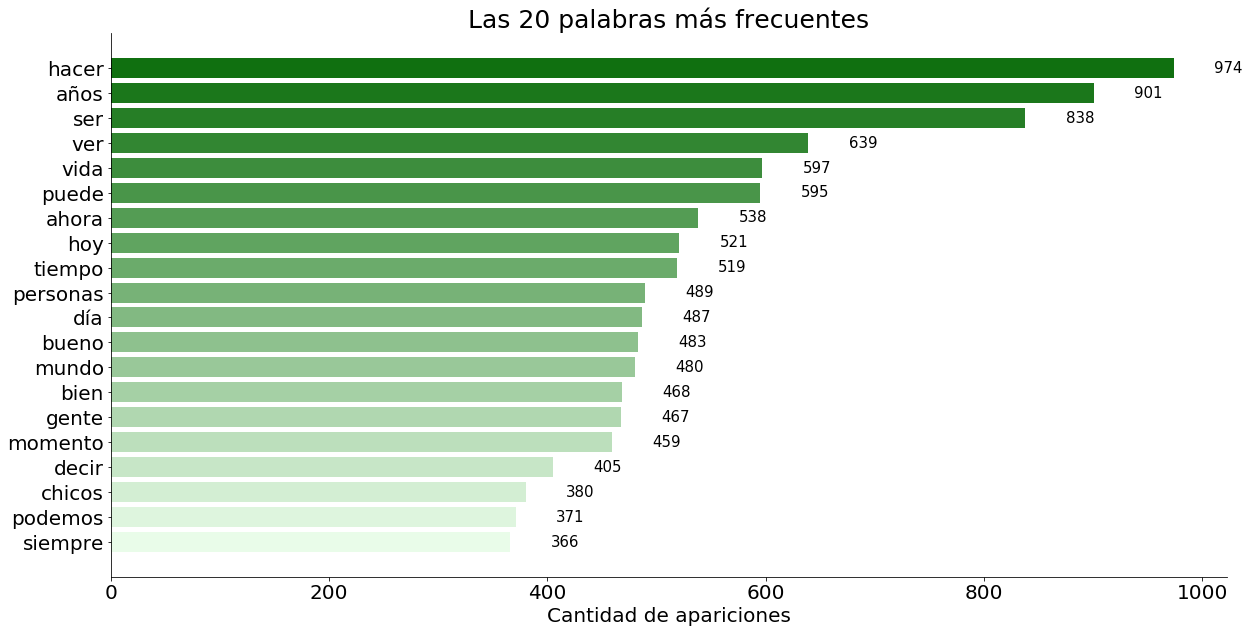

In [170]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="count_per_word", y=top_20.index, data=top_20, palette=sns.light_palette("green", n_colors=20, reverse=True))
plt.ylabel("")
plt.xlabel('Cantidad de apariciones', fontsize=20)
plt.title('Las 20 palabras más frecuentes', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.plot();

## Un pequeño wordcloud

In [171]:
head = counts.head(200)
to_plot = list(zip(head.index, head['count_per_word']))

In [200]:
def plot_wordcloud_from_list(a_list, title=None):
    if not title:
        title = "img_%d.jpg" % math.random.uniform(1, 12321)
    freqs_by_words = {}
    for a_topic_term in a_list:
        an_actual_word = a_topic_term[0]
        freqs_by_words[an_actual_word] = a_topic_term[1]

    wc = WordCloud(width=800, height=600, background_color="white", max_words=200, max_font_size=100, colormap='Set2')
    # generate word cloud
    wc.generate_from_frequencies(freqs_by_words)

    #show
    plt.figure(figsize=(15,10))
    plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()


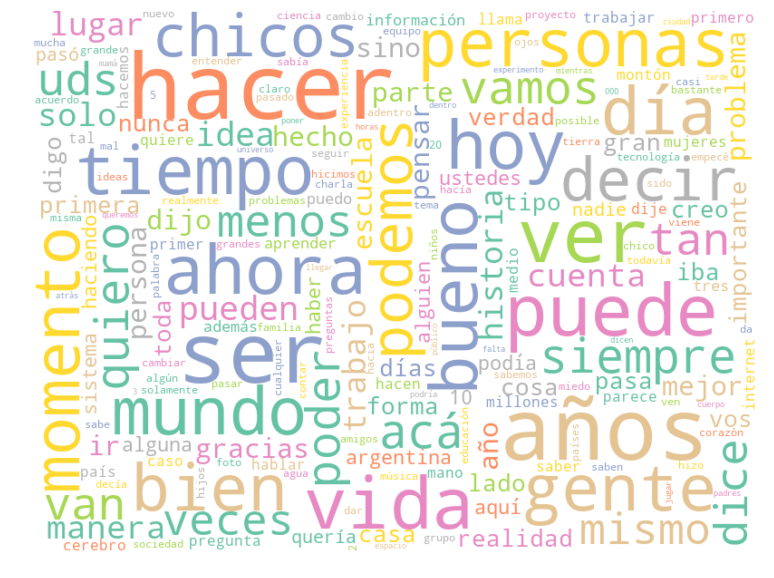

In [201]:
plot_wordcloud_from_list(to_plot, "wordcloud")

# Top 5 y su evolución por los años

In [142]:
top_5 = counts.head(5)
top_5

,count_per_word
hacer,974
años,901
ser,838
ver,639
vida,597


In [143]:
words_by_year = {}
top_five_words = top_5.index

for row in df[['words','year']].iterrows():
    r = row[1]
    if r.year not in words_by_year:
        words_by_year[r.year] = {
            top_five_words[0]: 0,
            top_five_words[1]: 0,
            top_five_words[2]: 0,
            top_five_words[3]: 0,
            top_five_words[4]: 0
        }
    for a_word in r.words:
        if a_word == top_five_words[0]:
            words_by_year[r.year][top_five_words[0]] += 1
        if a_word == top_five_words[1]:
            words_by_year[r.year][top_five_words[1]] += 1
        if a_word == top_five_words[2]:
            words_by_year[r.year][top_five_words[2]] += 1
        if a_word == top_five_words[3]:
            words_by_year[r.year][top_five_words[3]] += 1
        if a_word == top_five_words[4]:
            words_by_year[r.year][top_five_words[4]] += 1

In [144]:
ROWS = 2
COLS = 4
years = sorted(df.year.unique())
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
word_palette = sns.xkcd_palette(colors)


def autolabel(rects, x, y):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        axes[x,y].text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')


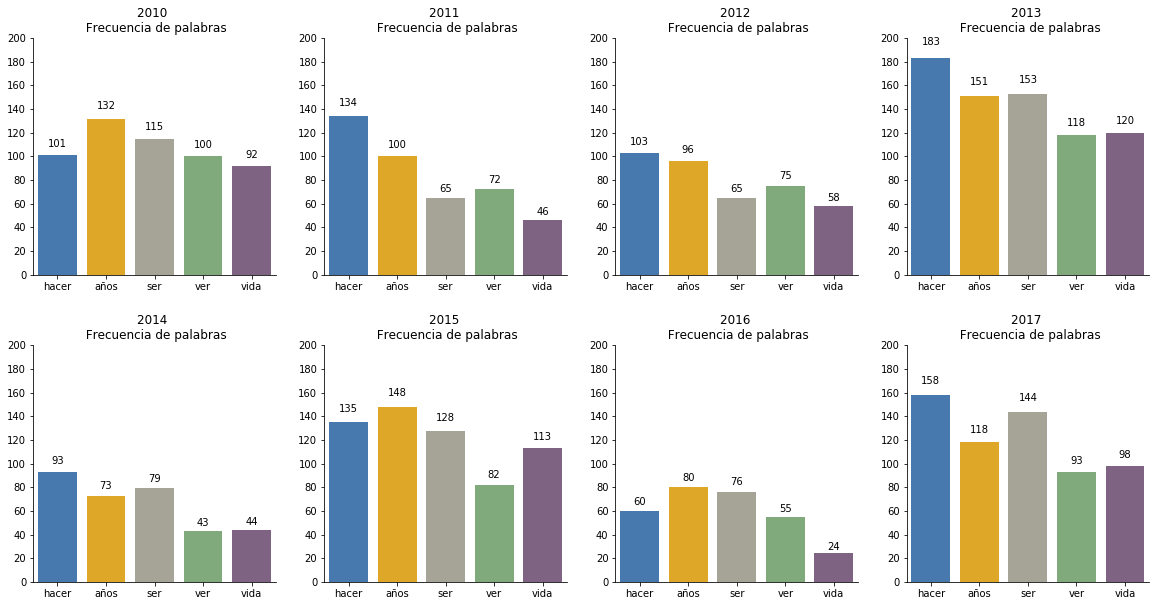

In [145]:
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(20,10))

for row in range(ROWS):
    for col in range(COLS):
        a_year = years.pop(0)
        words = words_by_year[a_year]
        sns.barplot(list(range(len(words))), list(words.values()), ax=axes[row, col], palette=word_palette)
        axes[row, col].set_xticks(range(len(words)))
        axes[row, col].set_xticklabels(list(words.keys()))
        axes[row, col].yaxis.set_major_locator(MaxNLocator(integer=True))
        axes[row, col].set_ylim([0,200])
        axes[row, col].set_title("%d \n Frecuencia de palabras" % a_year)
        axes[row, col].spines['right'].set_visible(False)
        axes[row, col].spines['top'].set_visible(False)
        autolabel(axes[row, col].patches, row, col)

plt.subplots_adjust(hspace = 0.3)
# plt.savefig('img/terms_by_album.jpg')
plt.show()

In [146]:
words_by_year = pd.DataFrame(words_by_year).transpose()

In [147]:
values_for_y_ticks = []
for a_word in words_by_year.columns:
    values_for_y_ticks.extend(words_by_year[a_word].unique())
values_for_y_ticks = list(set(values_for_y_ticks))

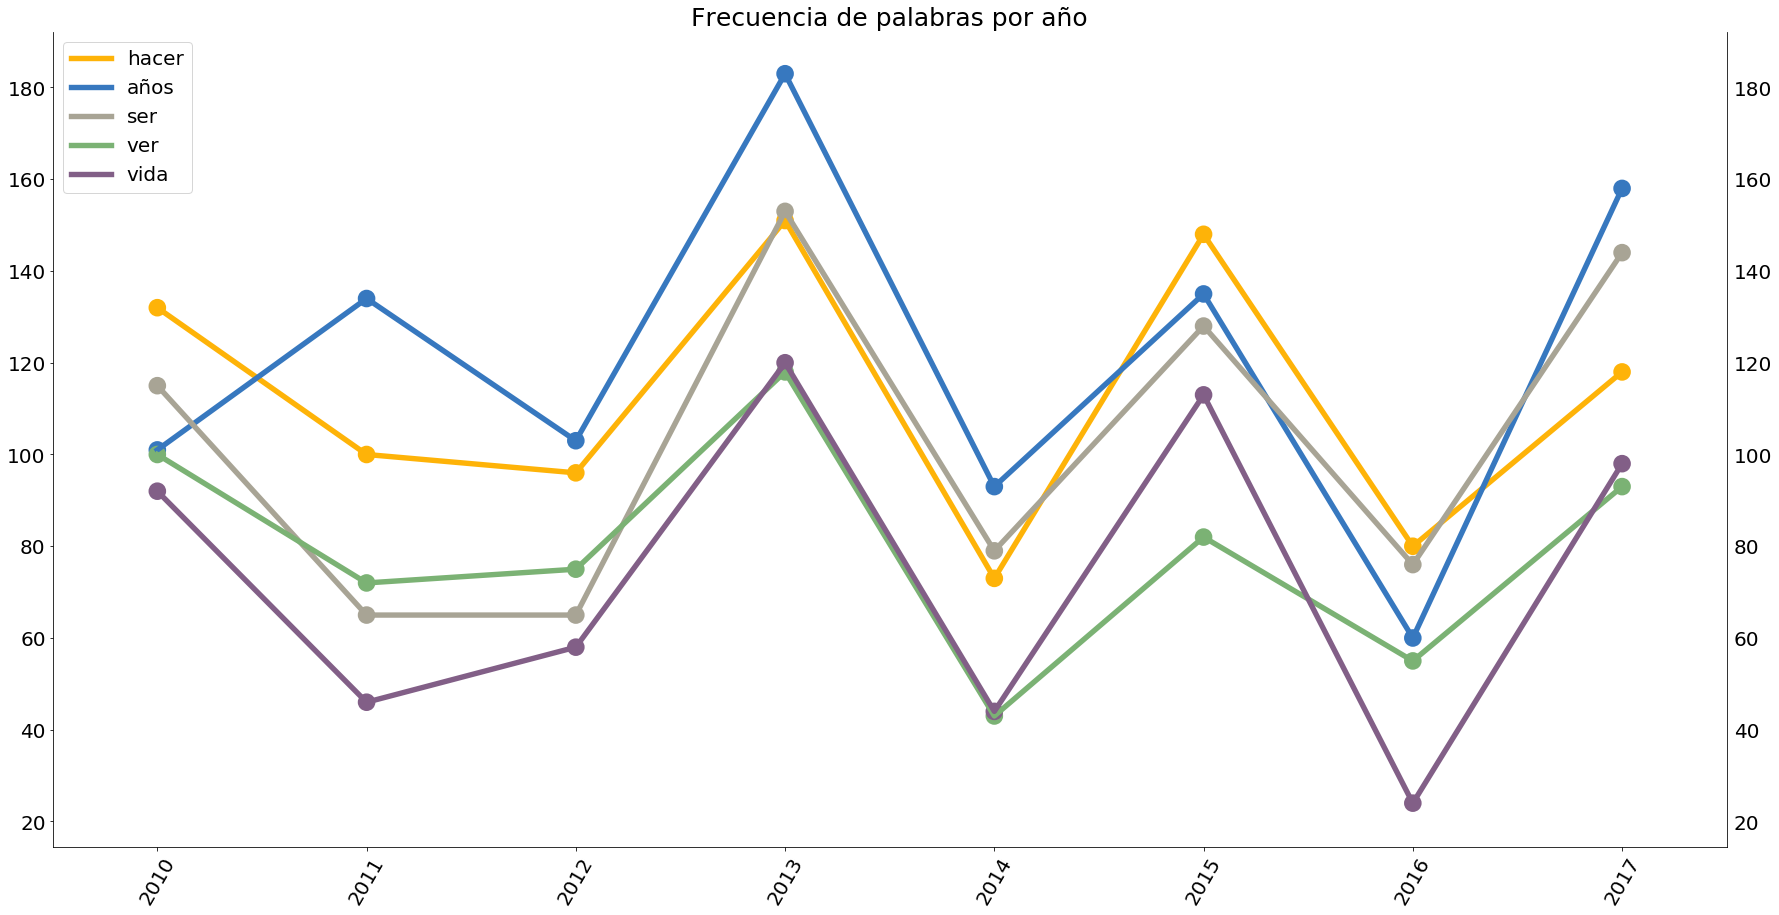

In [148]:
colormap = {'hacer': "xkcd:windows blue", 'años': "xkcd:amber", 'ser': "xkcd:greyish", 'ver': "xkcd:faded green", 'vida':"xkcd:dusty purple"}

fig, ax = plt.subplots(figsize=(30,15))
for top_word in list(words_by_year.columns):
    sns.pointplot(x=words_by_year.index, y=words_by_year[top_word], color=colormap[top_word], scale=2,)
ax.spines["top"].set_visible(False)
plt.tick_params(axis='both', labelright=True, labelsize=20)
ax.set_title("Frecuencia de palabras por año", fontdict={'fontsize': 25})
plt.ylabel("")
plt.xlabel('')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation(60)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
ax.legend(handles=ax.lines[::len(words_by_year)+1], labels=list(top_five_words), prop={'size': 20})
#plt.savefig('img/terms_by_year.jpg')
plt.show();

### Normalicemos?

Como la distribución no es pareja, podemos armar un cociente entre cantidad de palabras y cantidad de charlas.

In [149]:
words_by_year = pd.DataFrame(words_by_year).transpose()
words_by_year

,2010,2011,2012,2013,2014,2015,2016,2017
años,132,100,96,151,73,148,80,118
hacer,101,134,103,183,93,135,60,158
ser,115,65,65,153,79,128,76,144
ver,100,72,75,118,43,82,55,93
vida,92,46,58,120,44,113,24,98


In [150]:
for a_year in range(2010,2018):
    words_by_year[a_year] = words_by_year[a_year] / df.groupby('year').count()['file'][a_year]

In [151]:
words_by_year = pd.DataFrame(words_by_year).transpose()
words_by_year

,años,hacer,ser,ver,vida
2010,5.739130,4.391304,5.000000,4.347826,4.000000
2011,5.000000,6.700000,3.250000,3.600000,2.300000
2012,4.571429,4.904762,3.095238,3.571429,2.761905
2013,4.081081,4.945946,4.135135,3.189189,3.243243
2014,3.476190,4.428571,3.761905,2.047619,2.095238
2015,4.484848,4.090909,3.878788,2.484848,3.424242
2016,3.200000,2.400000,3.040000,2.200000,0.960000
2017,3.470588,4.647059,4.235294,2.735294,2.882353


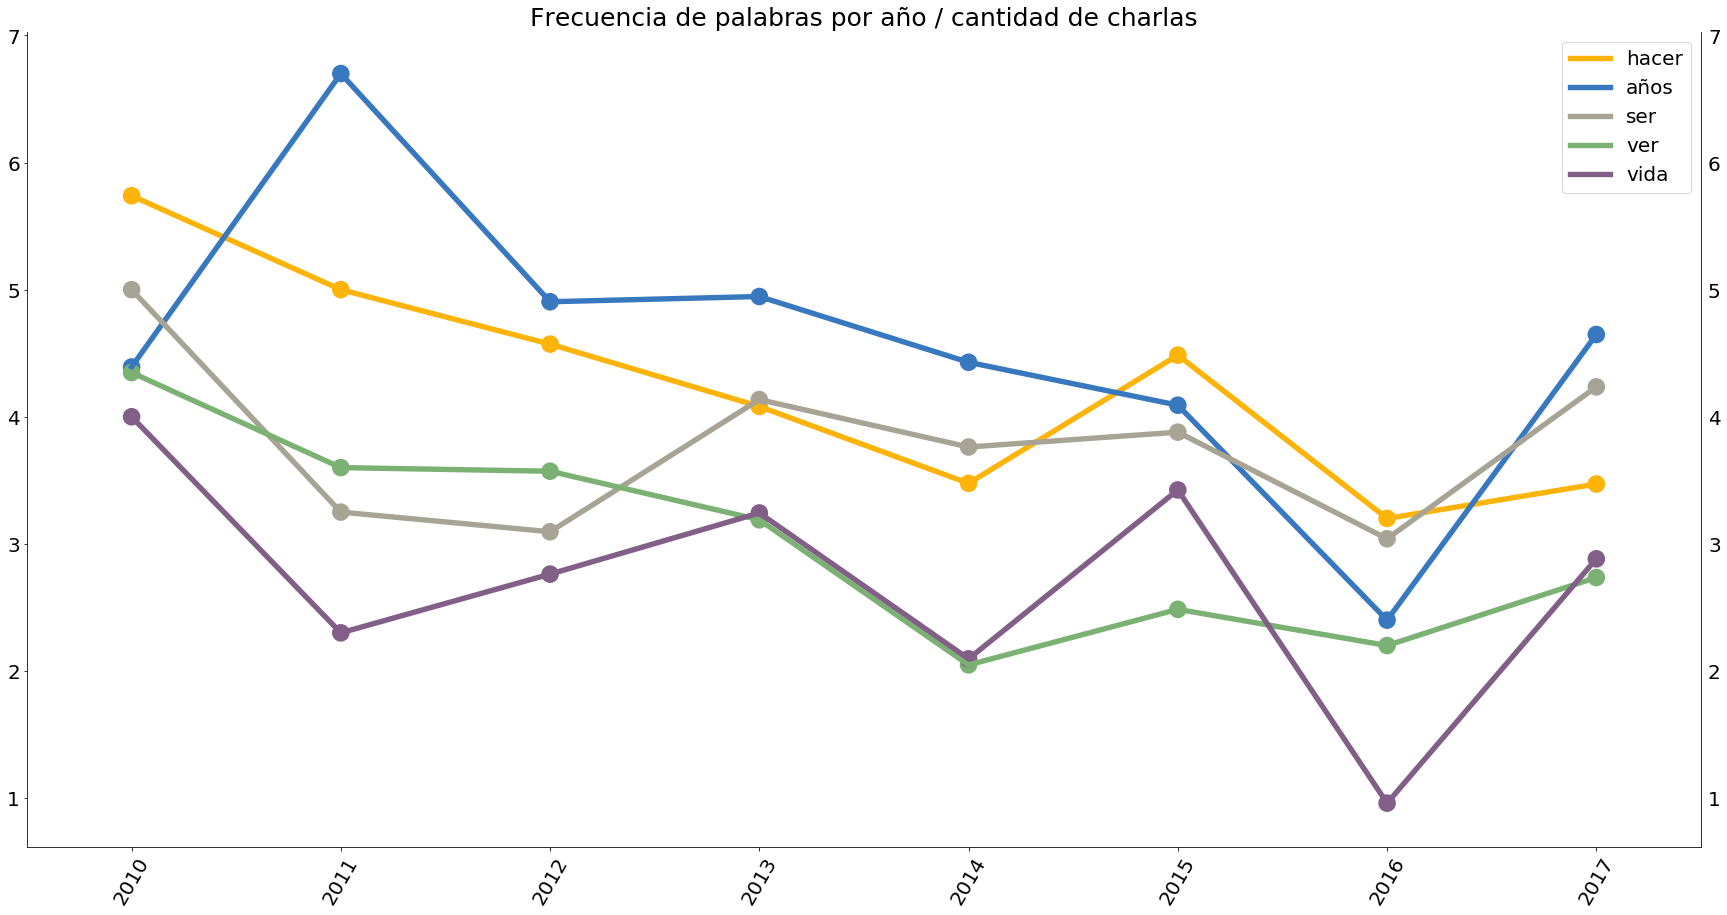

In [152]:
values_for_y_ticks = []
for a_word in words_by_year.columns:
    values_for_y_ticks.extend(words_by_year[a_word].unique())
values_for_y_ticks = list(set(values_for_y_ticks))

colormap = {'hacer': "xkcd:windows blue", 'años': "xkcd:amber", 'ser': "xkcd:greyish", 'ver': "xkcd:faded green", 'vida':"xkcd:dusty purple"}

fig, ax = plt.subplots(figsize=(30,15))
for top_word in list(words_by_year.columns):
    sns.pointplot(x=words_by_year.index, y=words_by_year[top_word], color=colormap[top_word], scale=2,)
ax.spines["top"].set_visible(False)
plt.tick_params(axis='both', labelright=True, labelsize=20)
ax.set_title("Frecuencia de palabras por año / cantidad de charlas", fontdict={'fontsize': 25})
plt.ylabel("")
plt.xlabel('')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation(60)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
ax.legend(handles=ax.lines[::len(words_by_year)+1], labels=list(top_five_words), prop={'size': 20})
#plt.savefig('img/terms_by_year.jpg')
plt.show();

# Top 5 de cada año

In [153]:
def plot_year(year, palette):
    rows = list()
    for row in df[df['year'] == year][['words']].iterrows():
        r = row[1]
        for word in r.words:
            rows.append((word))

    words = pd.DataFrame(rows, columns=['word'])
    words = words[words.word.str.len() > 0]
    words['word'] = words.word.str.lower()
    counts = words.word.value_counts().to_frame().rename(columns={'word':'count_per_word'})

    for a_stopword in stopwords:
        if a_stopword in counts.index:
            counts = counts.drop(a_stopword)

    drop_list = ['aplausos', 'si', 'entonces', 'así', 'risas', 'hace', 'vez', 'va', 'the', 'cada', 'ahí', 'dos', 'después', 'cosas', 'ejemplo', 'tener', 'muchas', 'todas', 'voy']
    for a_word in counts.index:
        if unidecode.unidecode(a_word) in stopwords:
            drop_list.append(a_word)

    for a_word in drop_list:
        if a_word in counts.index:
            counts = counts.drop([a_word])
    top_5 = counts.head(5)
    
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x="count_per_word", y=top_5.index, data=top_5, palette=palette)
    plt.ylabel("")
    plt.xlabel('Cantidad de apariciones', fontsize=20)
    plt.title('Las 5 palabras más frecuentes de %d' % year, fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + top_5.values[0][0] * 0.04 ,
                p.get_y() + p.get_height()/2,
                "%d" % width,
                ha="center", fontsize=15)
    sns.despine()
    plt.plot();

In [154]:
years = sorted(df.year.unique())
palettes = [
    sns.light_palette("red", n_colors=5, reverse=True),
    sns.light_palette("green", n_colors=5, reverse=True),
    sns.light_palette("blue", n_colors=5, reverse=True),
    sns.light_palette("grey", n_colors=5, reverse=True),
    sns.light_palette("yellow", n_colors=5, reverse=True),
    sns.light_palette("orange", n_colors=5, reverse=True),
    sns.light_palette("purple", n_colors=5, reverse=True),
    sns.light_palette("pink", n_colors=5, reverse=True),
]

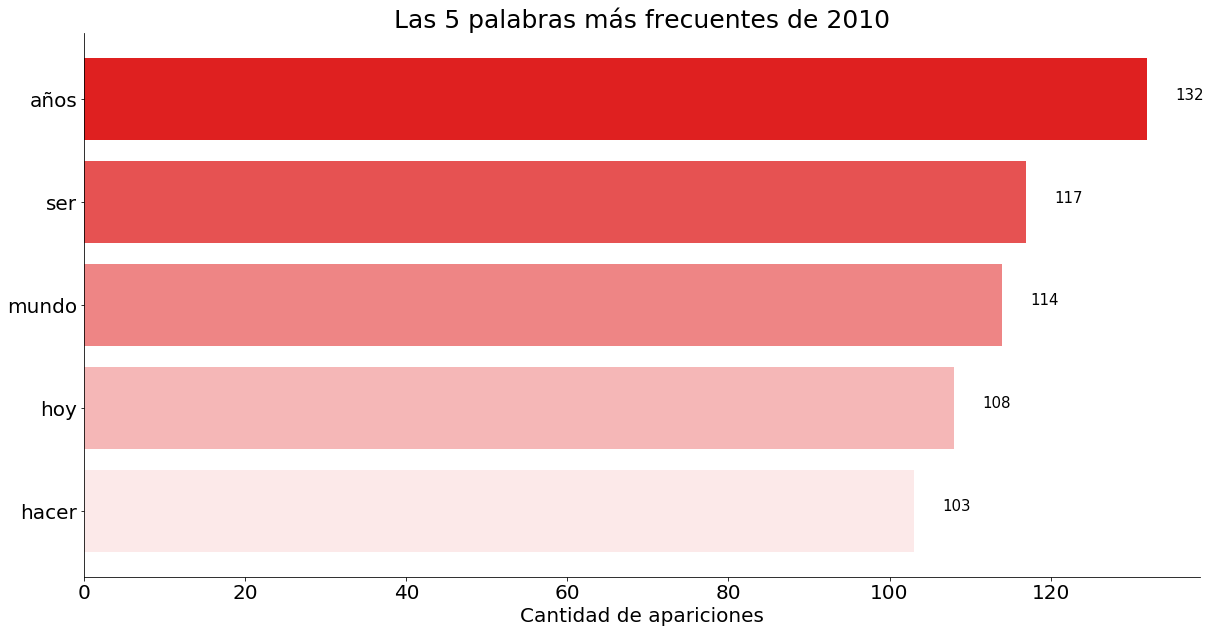

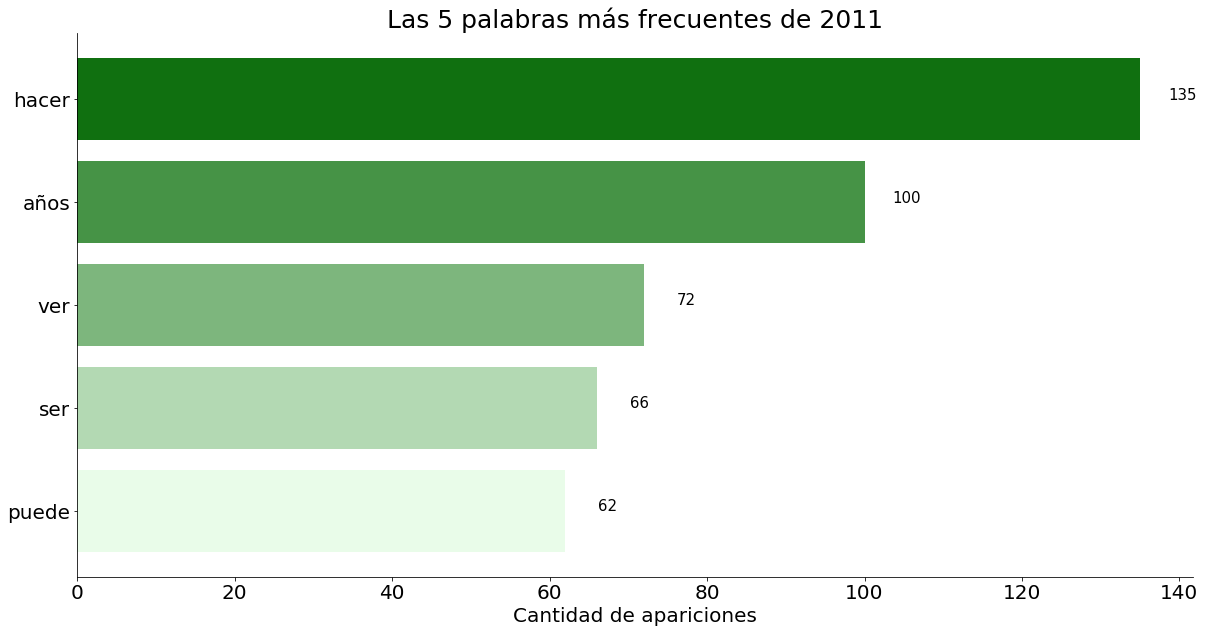

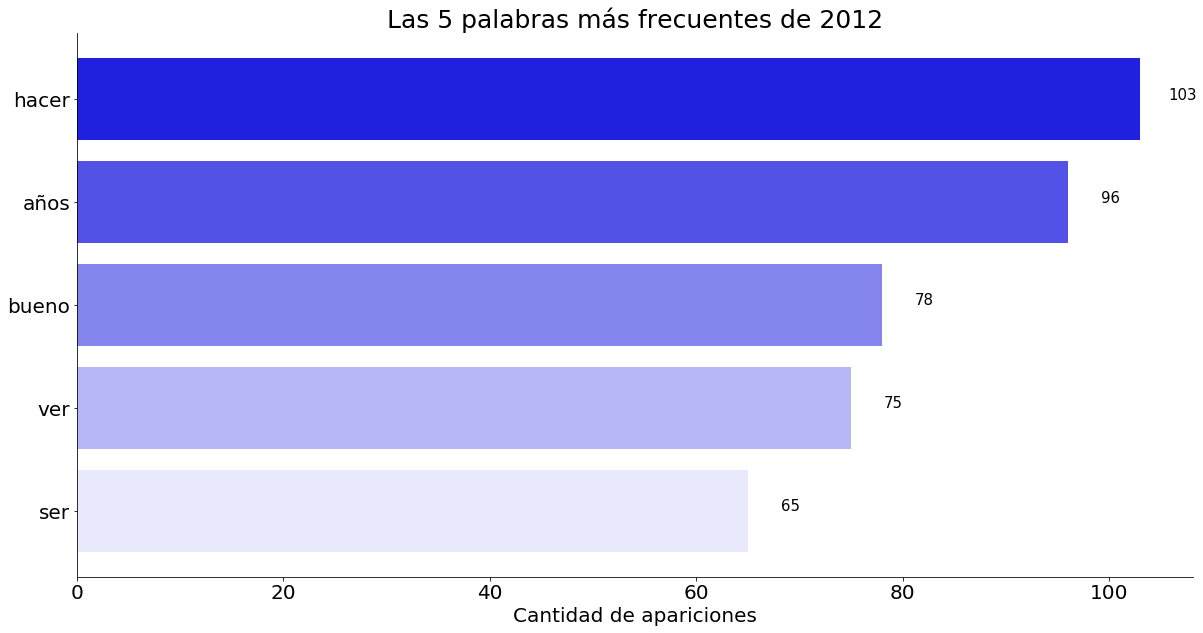

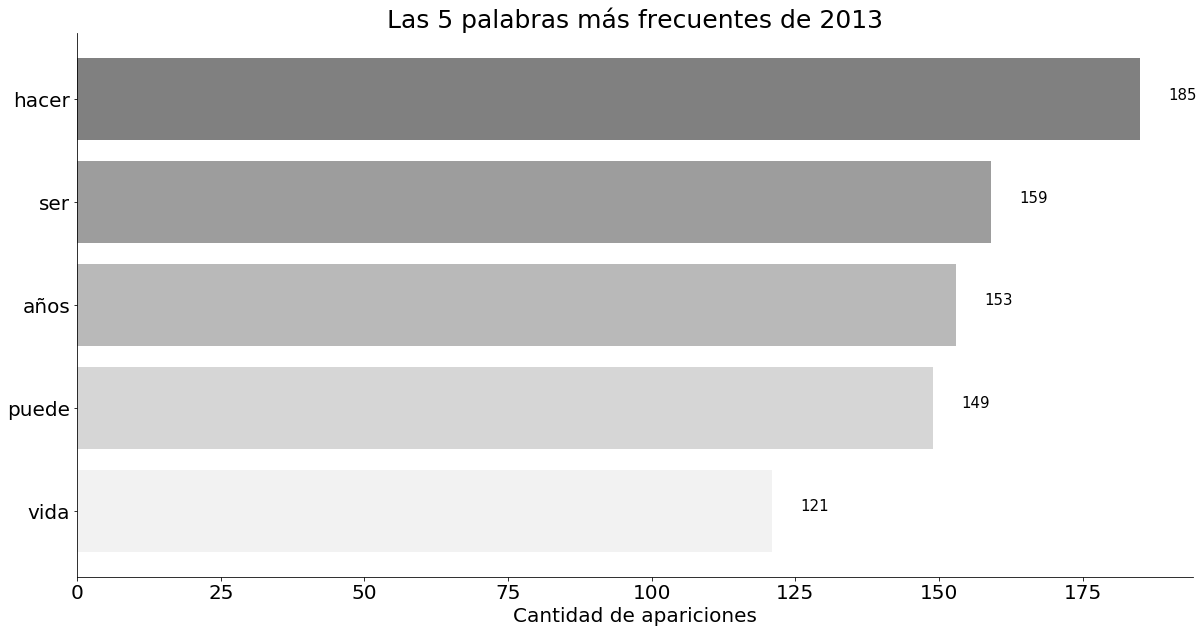

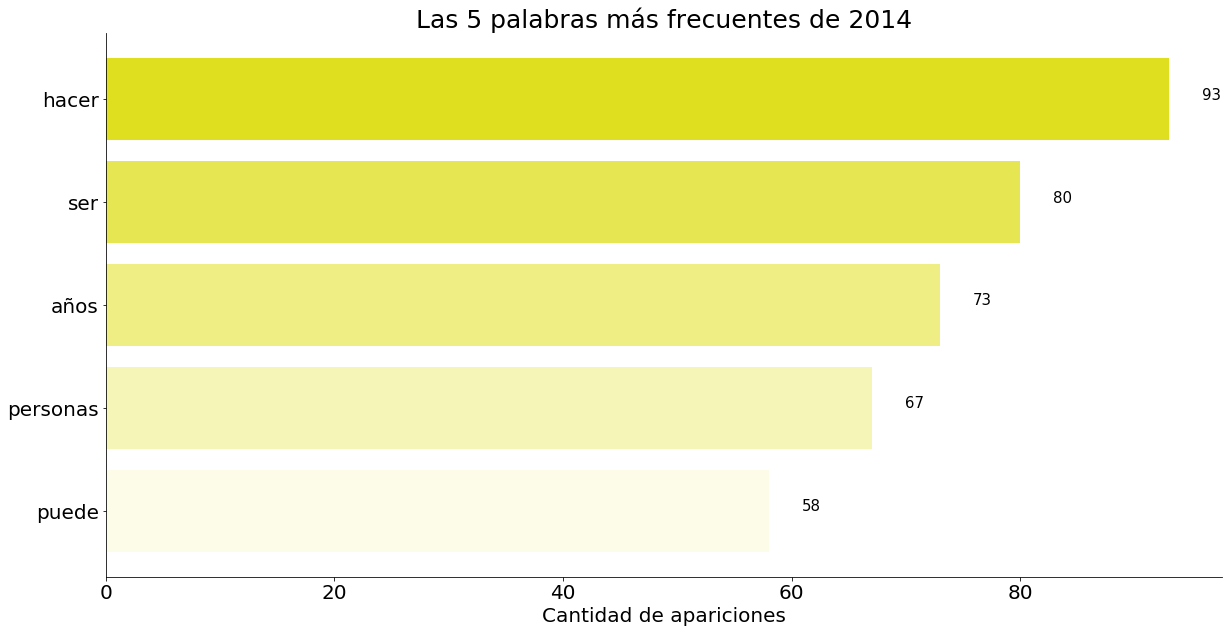

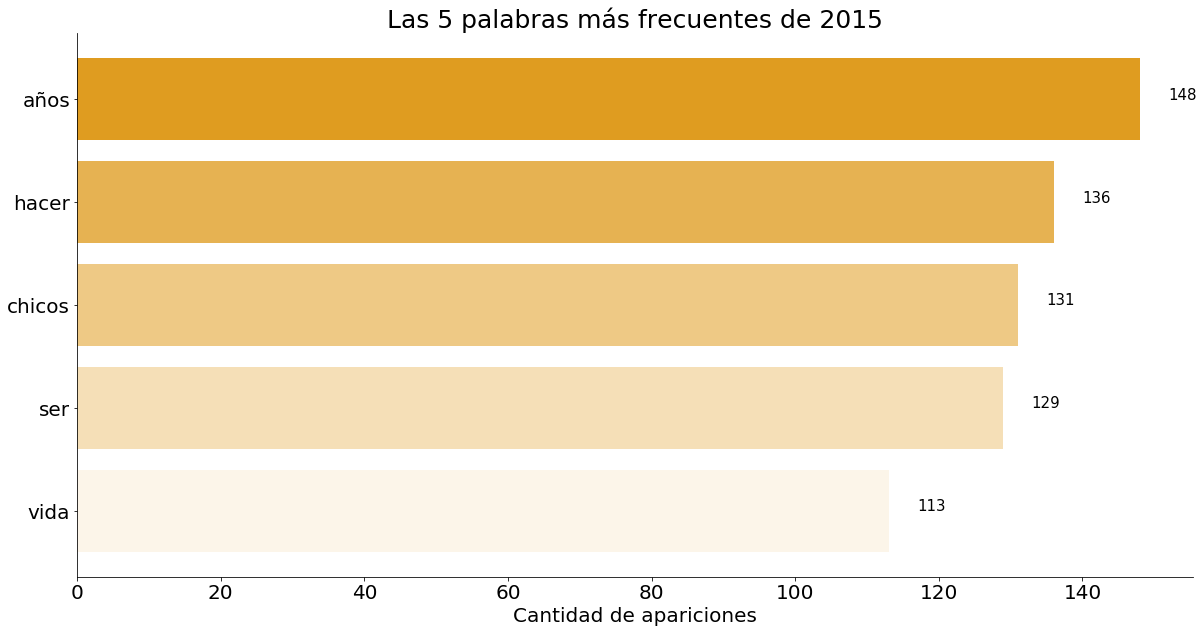

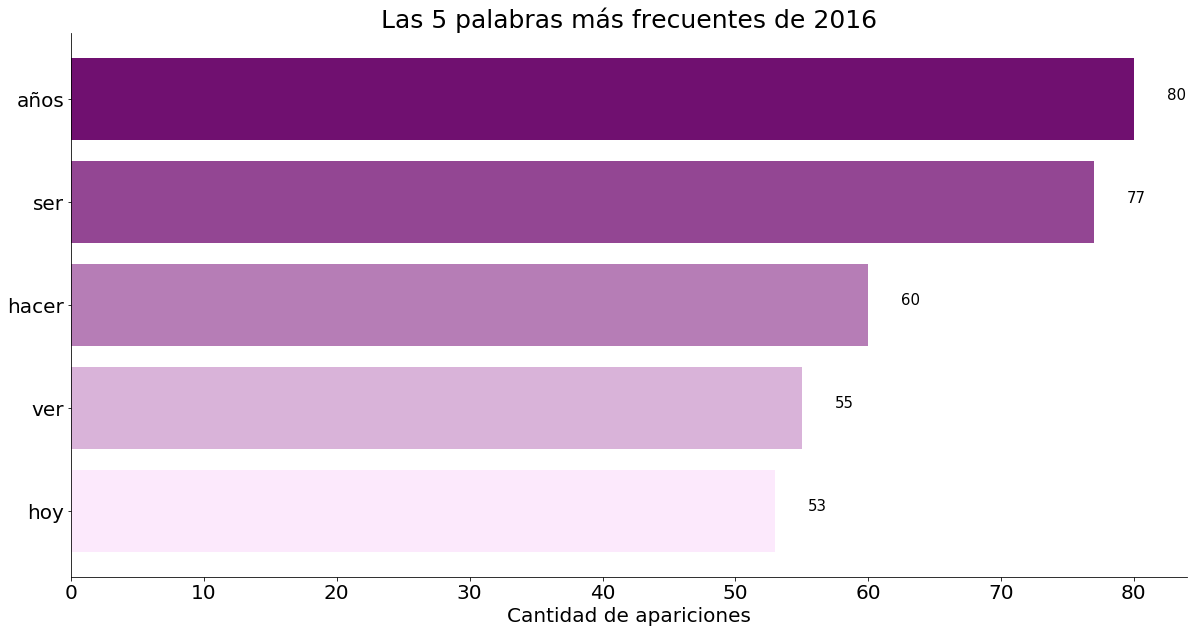

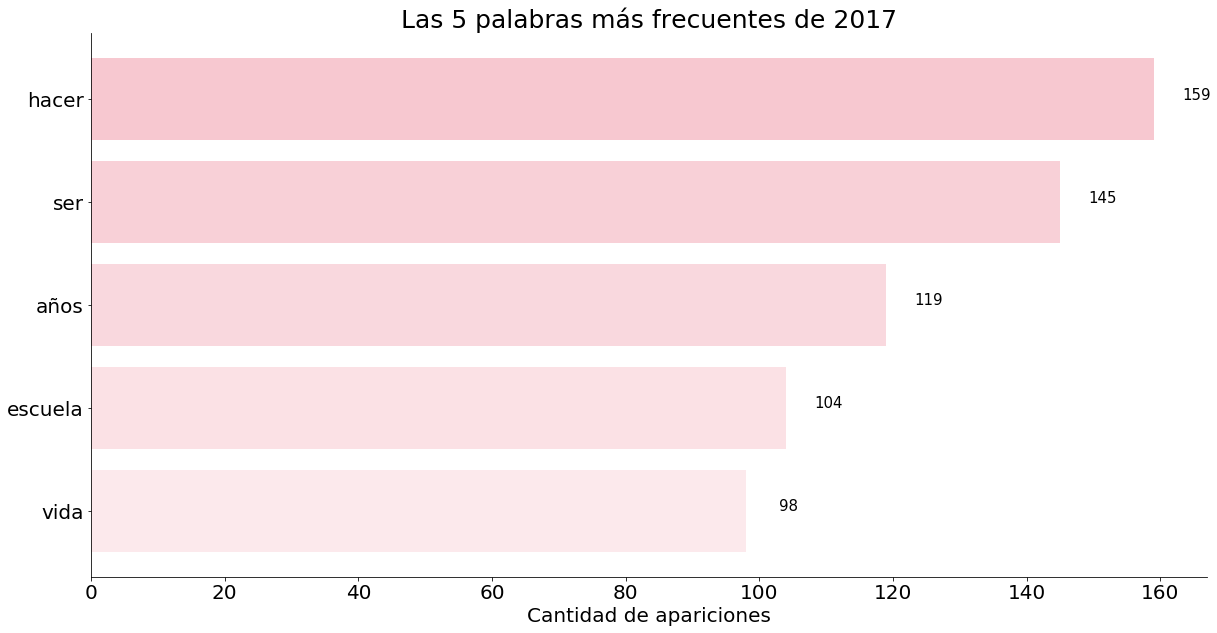

In [155]:
for a_year, a_palette in zip(years, palettes):
    plot_year(a_year, a_palette)

# Oradores con mayor vocabulario

In [156]:
stopset = set(stopwords + drop_list)
TED_TALK_DURATION = 20 * 60 # SECONDS. (20 min each ted talk)
df['tokens'] = pd.Series(dtype=object)
for index, row in df.iterrows():
    tokens = word_tokenize(row['text'])
    tokens_wo_stopwords = [word for word in tokens if not word in stopset]
    df.at[index, 'tokens'] = tokens_wo_stopwords
    df.at[index, 'le_d'] = ( len(tokens_wo_stopwords) / len(tokens) ) * 100
    df.at[index, 'ly_d'] = len(tokens) / TED_TALK_DURATION
    df.at[index, 'n_words'] = len(tokens)
    df.at[index, 'n_words_no_rep'] = len(list(set(tokens)))


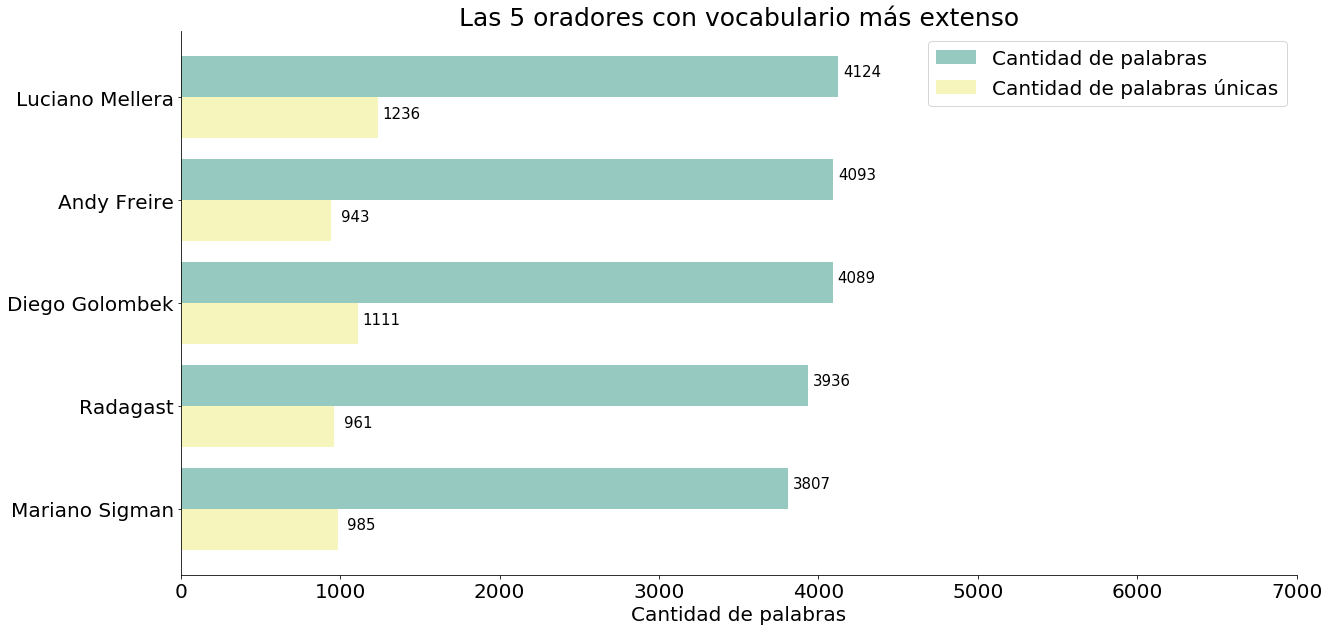

In [157]:
more_vocab = df.sort_values("n_words", ascending=False)[:5]
more_vocab = more_vocab[['speaker', 'n_words', 'n_words_no_rep']]
more_vocab.columns = ['speaker', 'Cantidad de palabras', 'Cantidad de palabras únicas']

more_vocab = (
    more_vocab.set_index('speaker')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Value'})
)



fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="Value", y='speaker', hue='Variable', data=more_vocab, palette="Set3")
plt.ylabel("")
plt.xlabel('Cantidad de palabras', fontsize=20)
plt.title('Las 5 oradores con vocabulario más extenso', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 150  ,
            p.get_y() + p.get_height()/2.,
            "%d" % width,
            ha="center", fontsize=15)
ax.legend(prop={'size': 20})
plt.xlim(0,7000)
sns.despine()
plt.plot();

# Fin por ahora!

-------------------------------

--------------------------------------------------------

Borrador

### Topic modelling

In [158]:
def display_topics(H, W, feature_names, documents, no_top_words, no_top_documents):
    print("NMF")
    for topic_idx, topic in enumerate(H):
        print()
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:no_top_documents]
        for doc_index in top_doc_indices:
            print(df.iloc[doc_index]['title'],df.iloc[doc_index]['speaker'])

In [159]:
documents = df.text

no_features = 1000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words=list(stopset))
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()


no_topics = 20

# Run NMF
nmf_model = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
nmf_W = nmf_model.transform(tfidf)
nmf_H = nmf_model.components_

no_top_words = 10
no_top_words = 10
no_top_documents = 4


In [160]:
display_topics(nmf_H, nmf_W, tfidf_feature_names, documents, no_top_words, no_top_documents)

NMF

Topic 0:
hacer años ser vida puede ver personas gente bueno mundo


NameError: name 'np' is not defined

Me gustó mas NMF

- 1/7/17
- 3
- 4
- 6/18
- 10
- 11
- 14
- 15
